#### <b>Load Required Libraries</b>

In [1]:
# load required PyTorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [2]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")

#### <b>Image Visualization</b>

In [3]:
# load an image visualization library
import matplotlib.pyplot as plt
import PIL

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

In [4]:
# show torch.Tensor image
def imshow(tensor):
    image = tensor.cpu().clone()
    image = image.squeeze(0) # [1, H, W]
    image = transforms.ToPILImage()(image)
    # show an image whose values are between [0, 1]
    plt.imshow(image)
    plt.show()

#### <b>Load Pre-trained Classification Model</b>

In [5]:
!wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EaLEiaWty0VKnJlfSHZwmkoBRMKuKa99rtR1j0m26l8MjA?download=1 -O mnist_model.pth

--2021-03-10 08:30:05--  https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EaLEiaWty0VKnJlfSHZwmkoBRMKuKa99rtR1j0m26l8MjA?download=1
Resolving postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)... 13.107.136.9
Connecting to postechackr-my.sharepoint.com (postechackr-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/dongbinna_postech_ac_kr/Documents/Research/models/CSED703G_LeNet_MNIST.pt?originalPath=aHR0cHM6Ly9wb3N0ZWNoYWNrci1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb25nYmlubmFfcG9zdGVjaF9hY19rci9FYUxFaWFXdHkwVktuSmxmU0had21rb0JSTUt1S2E5OXJ0UjFqMG0yNmw4TWpBP3J0aW1lPWRhdm10WjdqMkVn [following]
--2021-03-10 08:30:07--  https://postechackr-my.sharepoint.com/personal/dongbinna_postech_ac_kr/Documents/Research/models/CSED703G_LeNet_MNIST.pt?originalPath=aHR0cHM6Ly9wb3N0ZWNoYWNrci1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kb25nYmlubmFfcG9zdGVjaF9hY19rci9FYUxFaWFXdHkwVktuSmxmU0h

In [5]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1, padding=0)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(50 * 4 * 4, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.max_pool2d(self.conv1(x), (2, 2))
        x = F.max_pool2d(self.conv2(x), (2, 2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [6]:
model = LeNet()
model = model.to(device)
checkpoint = torch.load('./mnist_model.pth')
model.load_state_dict(checkpoint['net'])

<All keys matched successfully>

#### <b>Load Test Dataset</b>

In [7]:
from six.moves import urllib

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [8]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform_test)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=True, num_workers=2)

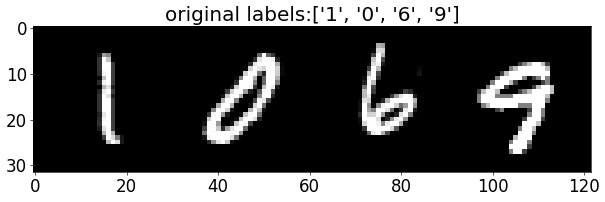

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 1 (1)
Image #2: 0 (0)
Image #3: 6 (6)
Image #4: 9 (9)


In [9]:
import numpy as np


def imshow_batch(input, title):
    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0))
    # display images
    plt.imshow(input)
    plt.title(title)
    plt.show()


# load a batch of validation image
iterator = iter(test_dataloader)

# visualize a batch of validation image
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs[:4])
imshow_batch(out, title='original labels:' + str([class_names[x] for x in classes[:4]]))

print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
for i, label in enumerate(classes[:4]):
    print(f'Image #{i + 1}: {class_names[label]} ({label})')

#### <b>Test Phase</b>

[Prediction Result Examples]


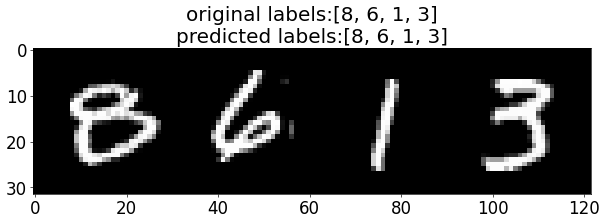

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 8 (8)
Image #1: 6 (6)
Image #1: 1 (1)
Image #1: 3 (3)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 8 (8)
Image #1: 6 (6)
Image #1: 1 (1)
Image #1: 3 (3)


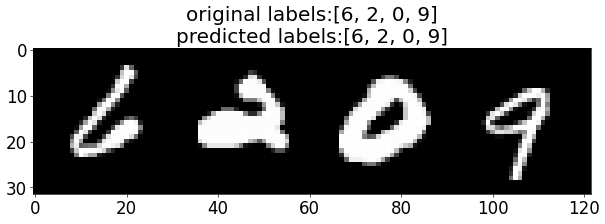

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 6 (6)
Image #1: 2 (2)
Image #1: 0 (0)
Image #1: 9 (9)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 6 (6)
Image #1: 2 (2)
Image #1: 0 (0)
Image #1: 9 (9)
[Validation] Loss: 0.0005 Accuracy: 98.9900% Time elapsed: 1.2150s (total 10000 images)


In [10]:
import time

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for i, (inputs, labels) in enumerate(test_dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if i == 0:
            print('[Prediction Result Examples]')
            images = torchvision.utils.make_grid(inputs[:4])
            imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                         '\npredicted labels:' + str([int(x) for x in preds[:4]]))
            print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
            for j, label in enumerate(labels[:4]):
                print(f'Image #{i + 1}: {class_names[label]} ({label})')
            print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
            for j, label in enumerate(preds[:4]):
                print(f'Image #{i + 1}: {class_names[label]} ({label})')
            images = torchvision.utils.make_grid(inputs[4:8])
            imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                         '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
            print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
            for j, label in enumerate(labels[4:8]):
                print(f'Image #{i + 1}: {class_names[label]} ({label})')
            print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
            for j, label in enumerate(preds[4:8]):
                print(f'Image #{i + 1}: {class_names[label]} ({label})')

    epoch_loss = running_loss / len(test_dataset)
    epoch_acc = running_corrects / len(test_dataset) * 100.
    print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

#### <b>Prepare Adversarial Attack Libraries</b>

In [11]:
!pip install foolbox
!pip install advertorch

In [12]:
def get_distance(a, b):
    l0 = torch.norm((a - b).view(a.shape[0], -1), p=0, dim=1)
    l2 = torch.norm((a - b).view(a.shape[0], -1), p=2, dim=1)
    mse = (a - b).view(a.shape[0], -1).pow(2).mean(1)
    linf = torch.norm((a - b).view(a.shape[0], -1), p=float('inf'), dim=1)
    return l0, l2, mse, linf

#### <b>Adversarial Attack Example 1</b>

* <b>Attack method</b>: 7-step L2 PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 0.25

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


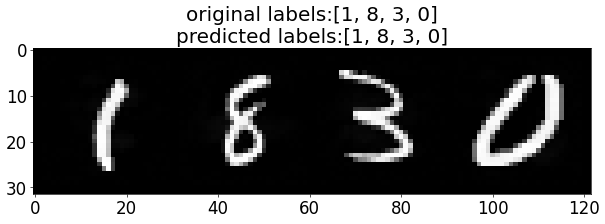

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 1 (1)
Image #1: 8 (8)
Image #1: 3 (3)
Image #1: 0 (0)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 1 (1)
Image #1: 8 (8)
Image #1: 3 (3)
Image #1: 0 (0)


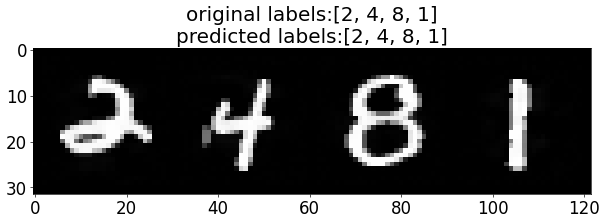

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 2 (2)
Image #1: 4 (4)
Image #1: 8 (8)
Image #1: 1 (1)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 2 (2)
Image #1: 4 (4)
Image #1: 8 (8)
Image #1: 1 (1)
[Step #0] Loss: 0.0016 Accuracy: 98.4375% Time elapsed: 0.3725s (total 64 images)
[Step #10] Loss: 0.0006 Accuracy: 98.5796% Time elapsed: 0.5613s (total 704 images)
[Step #20] Loss: 0.0008 Accuracy: 98.4375% Time elapsed: 0.7420s (total 1344 images)
[Step #30] Loss: 0.0008 Accuracy: 98.4879% Time elapsed: 0.9117s (total 1984 images)
[Step #40] Loss: 0.0009 Accuracy: 98.2851% Time elapsed: 1.0773s (total 2624 images)
[Step #50] Loss: 0.0009 Accuracy: 98.1618% Time elapsed: 1.2503s (total 3264 images)
[Step #60] Loss: 0.0008 Accuracy: 98.2070% Time elapsed: 1.4327s (total 3904 images)
[Step #70] Loss: 0.0009 Accuracy: 98.0854% Time elapsed: 1.6024s (total 4544 images)
[Step #80] Loss: 0.0009 Accuracy: 98.1096% Time elapsed: 1.7747s (total 5184 images)
[Step #90] Loss: 0.0009 Ac

In [13]:
import time
from advertorch.attacks import L2PGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = L2PGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=0.25, nb_iter=7, eps_iter=0.25/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Adversarial Attack Example 2</b>

* <b>Attack method</b>: 7-step L2 PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 0.5

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


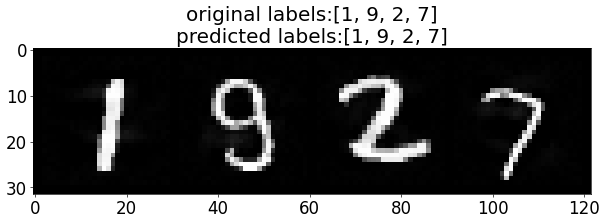

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 1 (1)
Image #1: 9 (9)
Image #1: 2 (2)
Image #1: 7 (7)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 1 (1)
Image #1: 9 (9)
Image #1: 2 (2)
Image #1: 7 (7)


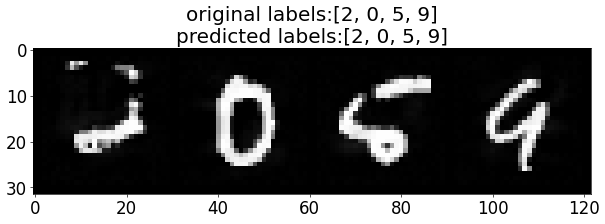

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 2 (2)
Image #1: 0 (0)
Image #1: 5 (5)
Image #1: 9 (9)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 2 (2)
Image #1: 0 (0)
Image #1: 5 (5)
Image #1: 9 (9)
[Step #0] Loss: 0.0010 Accuracy: 96.8750% Time elapsed: 0.4498s (total 64 images)
[Step #10] Loss: 0.0015 Accuracy: 96.5909% Time elapsed: 0.6352s (total 704 images)
[Step #20] Loss: 0.0017 Accuracy: 96.2798% Time elapsed: 0.8121s (total 1344 images)
[Step #30] Loss: 0.0018 Accuracy: 96.2198% Time elapsed: 0.9758s (total 1984 images)
[Step #40] Loss: 0.0018 Accuracy: 96.2652% Time elapsed: 1.1375s (total 2624 images)
[Step #50] Loss: 0.0019 Accuracy: 96.1397% Time elapsed: 1.3065s (total 3264 images)
[Step #60] Loss: 0.0018 Accuracy: 96.1066% Time elapsed: 1.4747s (total 3904 images)
[Step #70] Loss: 0.0018 Accuracy: 96.1488% Time elapsed: 1.6349s (total 4544 images)
[Step #80] Loss: 0.0019 Accuracy: 96.0455% Time elapsed: 1.8147s (total 5184 images)
[Step #90] Loss: 0.0019 Ac

In [14]:
import time
from advertorch.attacks import L2PGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = L2PGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=0.5, nb_iter=7, eps_iter=0.5/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Adversarial Attack Example 3</b>

* <b>Attack method</b>: 7-step L2 PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 1.0

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


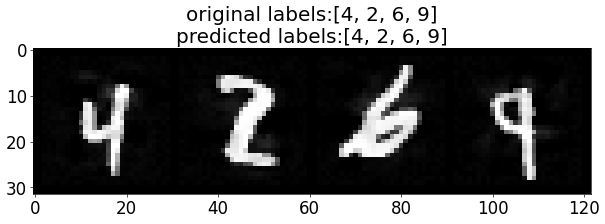

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 4 (4)
Image #1: 2 (2)
Image #1: 6 (6)
Image #1: 9 (9)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 4 (4)
Image #1: 2 (2)
Image #1: 6 (6)
Image #1: 9 (9)


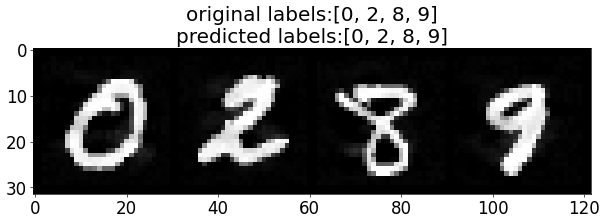

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 0 (0)
Image #1: 2 (2)
Image #1: 8 (8)
Image #1: 9 (9)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 0 (0)
Image #1: 2 (2)
Image #1: 8 (8)
Image #1: 9 (9)
[Step #0] Loss: 0.0081 Accuracy: 85.9375% Time elapsed: 0.3788s (total 64 images)
[Step #10] Loss: 0.0065 Accuracy: 88.4943% Time elapsed: 0.5558s (total 704 images)
[Step #20] Loss: 0.0068 Accuracy: 87.1280% Time elapsed: 0.7331s (total 1344 images)
[Step #30] Loss: 0.0072 Accuracy: 86.2399% Time elapsed: 0.9290s (total 1984 images)
[Step #40] Loss: 0.0071 Accuracy: 86.7378% Time elapsed: 1.1083s (total 2624 images)
[Step #50] Loss: 0.0070 Accuracy: 86.5809% Time elapsed: 1.2837s (total 3264 images)
[Step #60] Loss: 0.0070 Accuracy: 86.6035% Time elapsed: 1.4536s (total 3904 images)
[Step #70] Loss: 0.0070 Accuracy: 86.6857% Time elapsed: 1.6230s (total 4544 images)
[Step #80] Loss: 0.0072 Accuracy: 86.2269% Time elapsed: 1.7891s (total 5184 images)
[Step #90] Loss: 0.0073 Ac

In [15]:
import time
from advertorch.attacks import L2PGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = L2PGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=1.0, nb_iter=7, eps_iter=1.0/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Adversarial Attack Example 4</b>

* <b>Attack method</b>: 7-step L2 PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 2.0

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


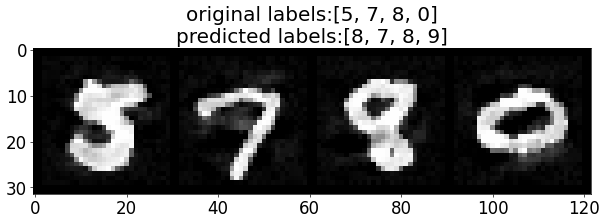

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 5 (5)
Image #1: 7 (7)
Image #1: 8 (8)
Image #1: 0 (0)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 8 (8)
Image #1: 7 (7)
Image #1: 8 (8)
Image #1: 9 (9)


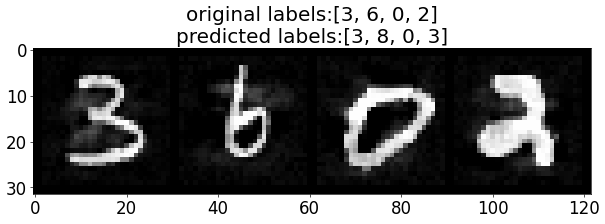

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 3 (3)
Image #1: 6 (6)
Image #1: 0 (0)
Image #1: 2 (2)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 3 (3)
Image #1: 8 (8)
Image #1: 0 (0)
Image #1: 3 (3)
[Step #0] Loss: 0.0487 Accuracy: 29.6875% Time elapsed: 0.3730s (total 64 images)
[Step #10] Loss: 0.0533 Accuracy: 28.5511% Time elapsed: 0.5681s (total 704 images)
[Step #20] Loss: 0.0538 Accuracy: 27.8274% Time elapsed: 0.7365s (total 1344 images)
[Step #30] Loss: 0.0537 Accuracy: 27.5706% Time elapsed: 0.8998s (total 1984 images)
[Step #40] Loss: 0.0537 Accuracy: 27.1341% Time elapsed: 1.0727s (total 2624 images)
[Step #50] Loss: 0.0537 Accuracy: 27.0221% Time elapsed: 1.2385s (total 3264 images)
[Step #60] Loss: 0.0541 Accuracy: 26.5113% Time elapsed: 1.4112s (total 3904 images)
[Step #70] Loss: 0.0546 Accuracy: 26.2764% Time elapsed: 1.5827s (total 4544 images)
[Step #80] Loss: 0.0545 Accuracy: 26.4853% Time elapsed: 1.7596s (total 5184 images)
[Step #90] Loss: 0.0549 Ac

In [16]:
import time
from advertorch.attacks import L2PGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = L2PGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=2.0, nb_iter=7, eps_iter=2.0/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Adversarial Attack Example 5</b>

* <b>Attack method</b>: 7-step L2 PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 4.0

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


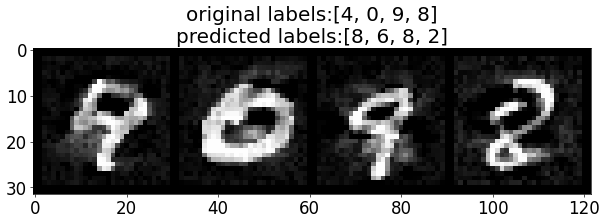

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 4 (4)
Image #1: 0 (0)
Image #1: 9 (9)
Image #1: 8 (8)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 8 (8)
Image #1: 6 (6)
Image #1: 8 (8)
Image #1: 2 (2)


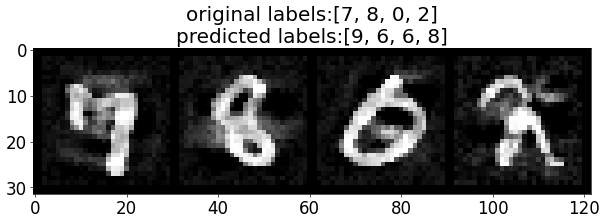

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 7 (7)
Image #1: 8 (8)
Image #1: 0 (0)
Image #1: 2 (2)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 9 (9)
Image #1: 6 (6)
Image #1: 6 (6)
Image #1: 8 (8)
[Step #0] Loss: 0.2283 Accuracy: 0.0000% Time elapsed: 0.3772s (total 64 images)
[Step #10] Loss: 0.2309 Accuracy: 0.0000% Time elapsed: 0.5635s (total 704 images)
[Step #20] Loss: 0.2347 Accuracy: 0.0000% Time elapsed: 0.7320s (total 1344 images)
[Step #30] Loss: 0.2351 Accuracy: 0.0504% Time elapsed: 0.9102s (total 1984 images)
[Step #40] Loss: 0.2342 Accuracy: 0.1524% Time elapsed: 1.0869s (total 2624 images)
[Step #50] Loss: 0.2339 Accuracy: 0.1225% Time elapsed: 1.2576s (total 3264 images)
[Step #60] Loss: 0.2345 Accuracy: 0.1025% Time elapsed: 1.4247s (total 3904 images)
[Step #70] Loss: 0.2344 Accuracy: 0.1100% Time elapsed: 1.5909s (total 4544 images)
[Step #80] Loss: 0.2348 Accuracy: 0.0965% Time elapsed: 1.7698s (total 5184 images)
[Step #90] Loss: 0.2351 Accuracy: 0

In [17]:
import time
from advertorch.attacks import L2PGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = L2PGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=4.0, nb_iter=7, eps_iter=4.0/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Adversarial Attack Example 6</b>

* <b>Attack method</b>: 7-step L2 PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 8.0

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


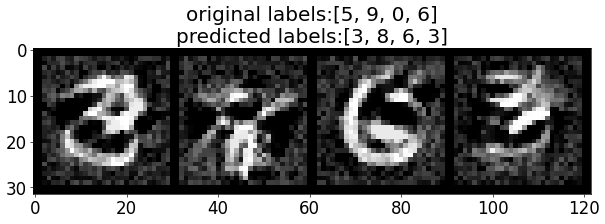

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 5 (5)
Image #1: 9 (9)
Image #1: 0 (0)
Image #1: 6 (6)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 3 (3)
Image #1: 8 (8)
Image #1: 6 (6)
Image #1: 3 (3)


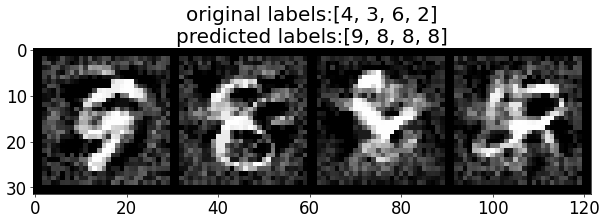

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 4 (4)
Image #1: 3 (3)
Image #1: 6 (6)
Image #1: 2 (2)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 9 (9)
Image #1: 8 (8)
Image #1: 8 (8)
Image #1: 8 (8)
[Step #0] Loss: 0.4887 Accuracy: 0.0000% Time elapsed: 0.4200s (total 64 images)
[Step #10] Loss: 0.4802 Accuracy: 0.0000% Time elapsed: 0.6263s (total 704 images)
[Step #20] Loss: 0.4774 Accuracy: 0.0000% Time elapsed: 0.8139s (total 1344 images)
[Step #30] Loss: 0.4800 Accuracy: 0.0000% Time elapsed: 0.9867s (total 1984 images)
[Step #40] Loss: 0.4796 Accuracy: 0.0000% Time elapsed: 1.1497s (total 2624 images)
[Step #50] Loss: 0.4795 Accuracy: 0.0000% Time elapsed: 1.3347s (total 3264 images)
[Step #60] Loss: 0.4793 Accuracy: 0.0000% Time elapsed: 1.4955s (total 3904 images)
[Step #70] Loss: 0.4794 Accuracy: 0.0000% Time elapsed: 1.6657s (total 4544 images)
[Step #80] Loss: 0.4793 Accuracy: 0.0000% Time elapsed: 1.8372s (total 5184 images)
[Step #90] Loss: 0.4799 Accuracy: 0

In [18]:
import time
from advertorch.attacks import L2PGDAttack

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

adversary = L2PGDAttack(
    model, loss_fn=nn.CrossEntropyLoss(reduction="sum"),
    eps=8.0, nb_iter=7, eps_iter=8.0/4, clip_min=0.0, clip_max=1.0, targeted=False)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    adv_untargeted = adversary.perturb(inputs, labels) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))

#### <b>Comparison with Foolbox</b>

* <b>Attack method</b>: 7-step L2 PGD
* <b>Images</b>: 5,000 valiation images
* <b>Epsilon size</b>: 0.25

The dimension of an image tensor: torch.Size([1, 28, 28])
[Prediction Result Examples]


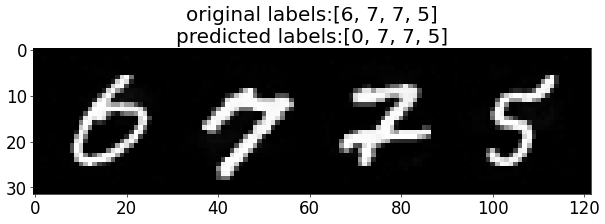

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 6 (6)
Image #1: 7 (7)
Image #1: 7 (7)
Image #1: 5 (5)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 0 (0)
Image #1: 7 (7)
Image #1: 7 (7)
Image #1: 5 (5)


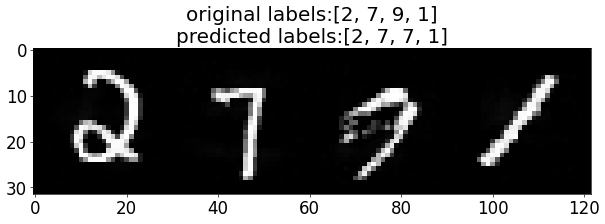

Original labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 2 (2)
Image #1: 7 (7)
Image #1: 9 (9)
Image #1: 1 (1)
Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>
Image #1: 2 (2)
Image #1: 7 (7)
Image #1: 7 (7)
Image #1: 1 (1)
[Step #0] Loss: 0.0013 Accuracy: 93.7500% Time elapsed: 0.4617s (total 64 images)
[Step #10] Loss: 0.0008 Accuracy: 97.8693% Time elapsed: 0.6725s (total 704 images)
[Step #20] Loss: 0.0009 Accuracy: 97.6190% Time elapsed: 0.8647s (total 1344 images)
[Step #30] Loss: 0.0009 Accuracy: 97.9335% Time elapsed: 1.0559s (total 1984 images)
[Step #40] Loss: 0.0012 Accuracy: 97.7134% Time elapsed: 1.2485s (total 2624 images)
[Step #50] Loss: 0.0011 Accuracy: 97.7941% Time elapsed: 1.4445s (total 3264 images)
[Step #60] Loss: 0.0011 Accuracy: 97.7971% Time elapsed: 1.6321s (total 3904 images)
[Step #70] Loss: 0.0010 Accuracy: 97.8433% Time elapsed: 1.8219s (total 4544 images)
[Step #80] Loss: 0.0010 Accuracy: 97.8009% Time elapsed: 2.0131s (total 5184 images)
[Step #90] Loss: 0.0010 Ac

In [19]:
import time
import foolbox as fb

criterion = nn.CrossEntropyLoss()
model.eval()
start_time = time.time()

fmodel = fb.PyTorchModel(model, bounds=(0, 1))
attack = fb.attacks.L2ProjectedGradientDescentAttack(abs_stepsize=0.25/4, steps=7)

running_loss = 0.
running_corrects = 0
running_length = 0

running_l0 = 0
running_l2 = 0
running_mse = 0
running_linf = 0

for i, (inputs, labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    _, adv_untargeted, _ = attack(fmodel, inputs, labels, epsilons=0.25) # adversarial attack

    outputs = model(adv_untargeted)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
    running_length += labels.shape[0]

    l0, l2, mse, linf = get_distance(adv_untargeted, inputs)
    running_l0 += l0.sum().item()
    running_l2 += l2.sum().item()
    running_mse += mse.sum().item()
    running_linf += linf.sum().item()

    if i == 0:
        print('The dimension of an image tensor:', inputs.shape[1:])
        print('[Prediction Result Examples]')
        images = torchvision.utils.make_grid(adv_untargeted[:4])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[:4]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[:4]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[:4]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        images = torchvision.utils.make_grid(adv_untargeted[4:8])
        imshow_batch(images.cpu(), title='original labels:' + str([int(x) for x in labels[4:8]]) +
                      '\npredicted labels:' + str([int(x) for x in preds[4:8]]))
        print('Original labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(labels[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')
        print('Predicted labels >>>>>>>>>>>>>>>>>>>>>>>>>')
        for j, label in enumerate(preds[4:8]):
            print(f'Image #{i + 1}: {class_names[label]} ({label})')

    if i % 10 == 0:
        cur_running_loss = running_loss / running_length
        running_acc = running_corrects / running_length * 100.
        print('[Step #{}] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(i, cur_running_loss, running_acc, time.time() - start_time, running_length))

epoch_loss = running_loss / len(test_dataset)
epoch_acc = running_corrects / len(test_dataset) * 100.
print('[Validation] Loss: {:.4f} Accuracy: {:.4f}% Time elapsed: {:.4f}s (total {} images)'.format(epoch_loss, epoch_acc, time.time() - start_time, len(test_dataset)))

print('[Size of Perturbation]')
print('Average L0 distance (the number of changed parameters):', running_l0 / len(test_dataset))
print('Average L2 distance:', running_l2 / len(test_dataset))
print('Average MSE:', running_mse / len(test_dataset))
print('Average Linf distance (the maximum changed values):', running_linf / len(test_dataset))